# CHURN PREDICTION

Data Cleaning & Model Optimizing
<br> [Datasets Source](https://www.kaggle.com/shrutimechlearn/churn-modelling)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

## Importing Data

In [2]:
data = pd.read_csv("CM_Dummy.csv")
data

,France,Germany,Spain,Female,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,1,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,1,0,0,1,0,502,42,8,159660.80,3,1,0,113931.57,1
3,1,0,0,1,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,1,0,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,771,39,5,0.00,2,1,0,96270.64,0
9996,1,0,0,0,1,516,35,10,57369.61,1,1,1,101699.77,0
9997,1,0,0,1,0,709,36,7,0.00,1,0,1,42085.58,1
9998,0,1,0,0,1,772,42,3,75075.31,2,1,0,92888.52,1


<hr>

## Data Standardizing

Standardizing using `StandardScaler`

In [5]:
scaler = StandardScaler()
dtFeatures = data.drop("Exited", axis= 1)
dtTarget = data["Exited"]

In [6]:
newColName = ["geo_FRA", "geo_GER", "geo_SPA", "gen_F", "gen_M", "CrScore", "Age", "Tnr", "Bal","NOfProd", "CC", "Actv", "Slr"]
dtScale = scaler.fit_transform(dtFeatures)
dtChurn = pd.DataFrame(dtScale, columns = newColName)
dtChurn["Exit"] = dtTarget
dtChurn

,geo_FRA,geo_GER,geo_SPA,gen_F,gen_M,CrScore,Age,Tnr,Bal,NOfProd,CC,Actv,Slr,Exit
0,0.997204,-0.578736,-0.573809,1.095988,-1.095988,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1
1,-1.002804,-0.578736,1.742740,1.095988,-1.095988,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0
2,0.997204,-0.578736,-0.573809,1.095988,-1.095988,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1
3,0.997204,-0.578736,-0.573809,1.095988,-1.095988,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0
4,-1.002804,-0.578736,1.742740,1.095988,-1.095988,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.997204,-0.578736,-0.573809,-0.912419,0.912419,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0
9996,0.997204,-0.578736,-0.573809,-0.912419,0.912419,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0
9997,0.997204,-0.578736,-0.573809,1.095988,-1.095988,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1
9998,-1.002804,1.727904,-0.573809,-0.912419,0.912419,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1


<hr>

## Data Splitting

`train_test_split` data to prepared into this following models : 
-  `LogisticRegression`
-  `DecisionTreeClassifier`
-  `KNeighborClassifier`
-  `RandomForestClassifier`

In [10]:
x = np.array(dtChurn.iloc[:,:-1])
y = np.array(dtChurn["Exit"])

In [11]:
xtr, xts, ytr, yts = train_test_split(x, y, test_size= .1)

len(xtr), len(xts)

(9000, 1000)

<hr>

## Hyper-parameter Tuning

In [37]:
def scoring(model, x, y):
    ypr = model.predict(x)
    scor = model.score(x, y)
    bas = balanced_accuracy_score(y, ypr)
    pcs = precision_score(y, ypr)
    rcl = recall_score(y, ypr)
    f1 = f1_score(y, ypr)
    auc = roc_auc_score(y, ypr)
    print("Score: ", round(scor,3))
    print("Balanced Accuracy Score: {:0.2f}".format(bas))
    print("Precision Score: {:0.2f}".format(pcs))
    print("Recall+: {:0.2f}".format(rcl))
    print("F1 Score: {:0.2f}".format(f1))
    print("AUC Score: {:0.2}".format(auc))

#### 1. Logistic Regression

In [13]:
penalty = ["l1", "l2", "elasticnet", "none"]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
max_iter = [1, 10, 100, 1000, 10000]

paramLore = {
    "penalty": penalty,
    "solver": solver,
    "max_iter" : max_iter
}

lore = LogisticRegression()
lore_rnd = RandomizedSearchCV(estimator= lore, param_distributions= paramLore, cv= 5)
lore_rnd.fit(xtr, ytr)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'max_iter': [1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg',

In [14]:
lore_rnd.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 10}

##### Logistic Regression Base Model

In [38]:
base_lore = LogisticRegression()
base_lore.fit(xtr, ytr)
scoring(base_lore, xts, yts)

Score:  0.814
Balanced Accuracy Score: 0.59
Precision Score: 0.55
Recall+: 0.22
F1 Score: 0.32
AUC Score: 0.59


##### Logistic Regression Best Model

In [39]:
best_lore = lore_rnd.best_estimator_
best_lore.fit(xtr, ytr)
scoring(best_lore, xts, yts)

Score:  0.813
Balanced Accuracy Score: 0.59
Precision Score: 0.55
Recall+: 0.22
F1 Score: 0.31
AUC Score: 0.59


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### 2. Decision Tree Classifier

In [48]:
paramDT = {"max_depth" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None] ,
          "presort" : [True, False]}

dtc = DecisionTreeClassifier()
dtc_rnd = RandomizedSearchCV(estimator= dtc, param_distributions= paramDT, cv= 5)
dtc_rnd.fit(xtr, ytr)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py:315: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py:315: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py:315: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort'

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [49]:
dtc_rnd.best_params_

{'presort': True, 'max_depth': 10}

##### Decision Tree Base Parameter

In [50]:
base_dtc = DecisionTreeClassifier()
base_dtc.fit(xtr, ytr)
scoring(base_dtc, xts, yts)

Score:  0.788
Balanced Accuracy Score: 0.67
Precision Score: 0.46
Recall+: 0.49
F1 Score: 0.47
AUC Score: 0.67


##### Decision Tree Best Parameter

In [51]:
best_dtc = dtc_rnd.best_estimator_
best_dtc.fit(xtr, ytr)
scoring(best_dtc, xts, yts)

Score:  0.831
Balanced Accuracy Score: 0.69
Precision Score: 0.58
Recall+: 0.46
F1 Score: 0.52
AUC Score: 0.69


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py:315: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


#### 3. K-Neighbor Classifier

In [40]:
k = round(xtr.shape[0] ** .5)
if k % 2 == 0:
    k+=1
    
n_neighbors = list(range(k-5, k+5))
algo = ["ball_tree", "kd_tree", "brute", "auto"]

paramKNN = {
    "n_neighbors": n_neighbors,
    "algorithm": algo
}

knn = KNeighborsClassifier()
knn_rnd = RandomizedSearchCV(estimator= knn, param_distributions= paramKNN, cv= 5)
knn_rnd.fit(xtr, ytr)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute', 'auto'],
                                        'n_neighbors': [90, 91, 92, 93, 94, 95,
                                                        96, 97, 98, 99]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [41]:
knn_rnd.best_params_

{'n_neighbors': 91, 'algorithm': 'auto'}

##### K-Neighbor Base Parameter

In [42]:
base_knn = KNeighborsClassifier()
base_knn.fit(xtr, ytr)
scoring(base_knn, xts, yts)

Score:  0.819
Balanced Accuracy Score: 0.63
Precision Score: 0.56
Recall+: 0.32
F1 Score: 0.41
AUC Score: 0.63


##### K-Neighbor Best Parameter

In [43]:
best_knn = knn_rnd.best_estimator_
best_knn.fit(xtr, ytr)
scoring(best_knn, xts, yts)

Score:  0.828
Balanced Accuracy Score: 0.57
Precision Score: 0.82
Recall+: 0.14
F1 Score: 0.25
AUC Score: 0.57


#### 4. Random Forest Classifier

In [44]:
n_estimators = list(range(10, 100, 5))
max_features = ['auto', 'sqrt']
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

paramRFC = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc = RandomForestClassifier()
rfc_rnd = RandomizedSearchCV(estimator= rfc, param_distributions= paramRFC, cv= 5)
rfc_rnd.fit(xtr, ytr)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [45]:
rfc_rnd.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'bootstrap': True}

##### Random Forest Base Parameter

In [46]:
base_rf = RandomForestClassifier()
base_rf.fit(xtr, ytr)
scoring(base_rf, xts, yts)

Score:  0.861
Balanced Accuracy Score: 0.70
Precision Score: 0.74
Recall+: 0.44
F1 Score: 0.55
AUC Score: 0.7


##### Random Forest Best Parameter

In [47]:
best_rf = rfc_rnd.best_estimator_
best_rf.fit(xtr, ytr)
scoring(best_rf, xts, yts)

Score:  0.856
Balanced Accuracy Score: 0.68
Precision Score: 0.74
Recall+: 0.40
F1 Score: 0.52
AUC Score: 0.68


### Comparing Score

In [53]:
base = [base_lore, base_dtc, base_knn, base_rf]
best = [best_lore, best_dtc, best_knn, best_rf]
base_score = []
best_score = []

for i in base:
    base_score.append(i.score(xts, yts))

for i in best:
    best_score.append(i.score(xts, yts))
    
mod = ["Logistic Regression", "Decision Tree Classifier", "K-Neighbor Classifier", "Random Forest Classifier"]

modscore = {}
modscore["Model"] = mod
modscore["Base"] = base_score
modscore["Best"] = best_score

Score = pd.DataFrame.from_dict(modscore)
Score

,Model,Base,Best
0,Logistic Regression,0.814,0.813
1,Decision Tree Classifier,0.788,0.831
2,K-Neighbor Classifier,0.819,0.828
3,Random Forest Classifier,0.861,0.856


#### Dari 4 model, diputuskan menggunakan model Random Forest Classifier sebagai model untuk machine learning

In [66]:
trial = pd.DataFrame({'actual': yts, 'pred': base_rf.predict(xts)}, dtype='int64')
trial.sort_values('actual',inplace=True)
trial.reset_index(inplace=True)
trial.head(100)

,index,actual,pred
0,0,0,0
1,629,0,0
2,630,0,0
3,631,0,0
4,632,0,1
...,...,...,...
95,674,0,0
96,692,0,0
97,676,0,0
98,679,0,0


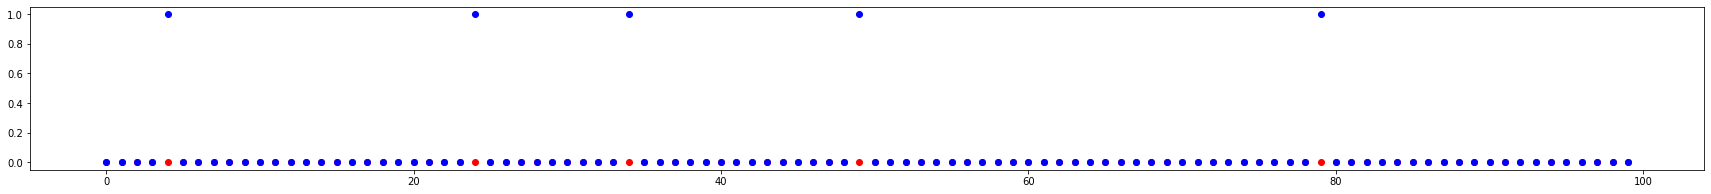

In [67]:
plt.figure(figsize=(30,3))
plt.plot(trial.head(100).index.tolist(), trial.head(100).actual, 'ro')
plt.plot(trial.head(100).index.tolist(), trial.head(100).pred, 'bo')
plt.show()

##### Warna merah menunjukkan data yang tidak berhasil diprediksi oleh model

In [69]:
import joblib

In [70]:
joblib.dump(base_rf, "modelFix")
joblib.dump(base_rf, "modelScaler")

['modelScaler']